In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df = pd.read_csv("data.csv")
df

,EmployeeID,ExperienceYears,Age,SalaryLakhs
0,1,1,22,3.5
1,2,2,23,4.0
2,3,2,24,4.2
3,4,3,25,4.8
4,5,4,26,5.2
5,6,5,27,6.0
6,7,6,28,6.8
7,8,7,29,7.5
8,9,8,30,8.2
9,10,9,31,9.0


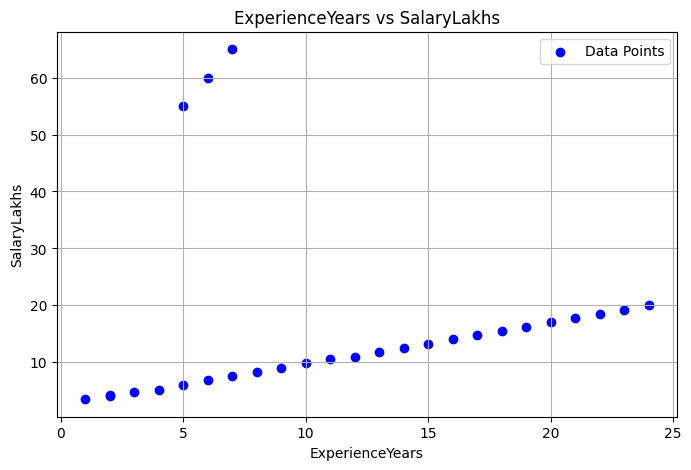

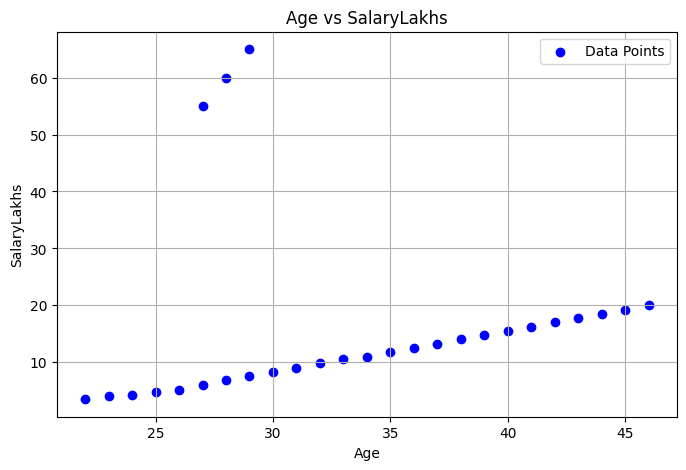

In [6]:
features = ["ExperienceYears", "Age"]
target = "SalaryLakhs"

for features in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[features], df[target], color="blue", label="Data Points")
    plt.title(f"{features} vs {target}")
    plt.xlabel(features)
    plt.ylabel(target)
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
z_score = np.abs(stats.zscore(df[target]))

threshold = 3 # Common threshold for identifying outliers
outliers = np.where(z_score > threshold)[0]

print(f"Outliers detected at indices: {outliers}")

Outliers detected at indices: [27]


# Quartile Method

In [16]:
q1 = df[target].quantile(0.25)
q3 = df[target].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers_iqr = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
outliers_iqr


,EmployeeID,ExperienceYears,Age,SalaryLakhs
25,26,5,27,55.0
26,27,6,28,60.0
27,28,7,29,65.0


In [17]:
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

lower_bound: -7.4875
upper_bound: 32.0125


In [18]:
# removing outliers
df_no_outliers = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]
df_no_outliers

,EmployeeID,ExperienceYears,Age,SalaryLakhs
0,1,1,22,3.5
1,2,2,23,4.0
2,3,2,24,4.2
3,4,3,25,4.8
4,5,4,26,5.2
5,6,5,27,6.0
6,7,6,28,6.8
7,8,7,29,7.5
8,9,8,30,8.2
9,10,9,31,9.0
